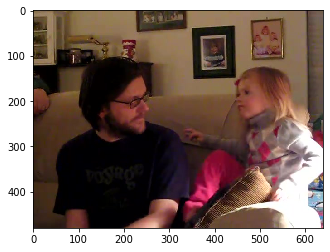

In [25]:
from matplotlib import pyplot as plt
%matplotlib inline
img_path = 'frames/1008/4219909195/4219909195_000600.jpg'
img = plt.imread(img_path)
plt.imshow(img)
plt.show()

In [26]:
import os, pickle
# bboxes_root = '/home/aicsvidhoi1/rlt_system/output/res101/vidor_2020_test'
bboxes_root = 'detection_results'
bbox_path = os.path.join(bboxes_root, '1008', '4219909195.pkl')
with open(bbox_path, 'rb') as f:
    bboxes = pickle.load(f)
print(len(bboxes.keys()))
print(sorted(bboxes.keys()))

1003
['4219909195_000002.jpg', '4219909195_000003.jpg', '4219909195_000004.jpg', '4219909195_000005.jpg', '4219909195_000006.jpg', '4219909195_000007.jpg', '4219909195_000008.jpg', '4219909195_000009.jpg', '4219909195_000010.jpg', '4219909195_000011.jpg', '4219909195_000012.jpg', '4219909195_000013.jpg', '4219909195_000014.jpg', '4219909195_000015.jpg', '4219909195_000016.jpg', '4219909195_000017.jpg', '4219909195_000018.jpg', '4219909195_000019.jpg', '4219909195_000020.jpg', '4219909195_000021.jpg', '4219909195_000022.jpg', '4219909195_000023.jpg', '4219909195_000024.jpg', '4219909195_000025.jpg', '4219909195_000026.jpg', '4219909195_000027.jpg', '4219909195_000028.jpg', '4219909195_000029.jpg', '4219909195_000030.jpg', '4219909195_000031.jpg', '4219909195_000032.jpg', '4219909195_000033.jpg', '4219909195_000034.jpg', '4219909195_000035.jpg', '4219909195_000036.jpg', '4219909195_000037.jpg', '4219909195_000038.jpg', '4219909195_000039.jpg', '4219909195_000040.jpg', '4219909195_000041.

In [27]:
import numpy as np
vidor_classes = np.asarray(['__background__',
                            'bread', 'cake', 'dish', 'fruits', 'vegetables', 'backpack', 'camera',
                            'cellphone', 'handbag', 'laptop', 'suitcase', 'ball/sports_ball',
                            'bat', 'frisbee', 'racket', 'skateboard', 'ski', 'snowboard', 'surfboard', 'toy',
                            'baby_seat', 'bottle', 'chair', 'cup', 'electric_fan', 'faucet', 'microwave', 'oven',
                            'refrigerator', 'screen/monitor',
                            'sink', 'sofa', 'stool', 'table', 'toilet', 'guitar', 'piano', 'baby_walker', 'bench',
                            'stop_sign', 'traffic_light', 'aircraft', 'bicycle', 'bus/truck',
                            'car', 'motorcycle', 'scooter', 'train', 'watercraft', 'crab', 'bird', 'chicken',
                            'duck', 'penguin', 'fish', 'stingray', 'crocodile', 'snake', 'turtle', 'antelope',
                            'bear', 'camel', 'cat', 'cattle/cow',
                            'dog', 'elephant', 'hamster/rat',
                            'horse', 'kangaroo', 'leopard', 'lion', 'panda', 'pig', 'rabbit', 'sheep/goat',
                            'squirrel', 'tiger', 'adult', 'baby', 'child'
                            ])

In [28]:
def vis_detections(im, class_name, dets, thresh=0.8):
    """Visual debugging of detections."""
    for i in range(np.minimum(10, dets.shape[0])):
        bbox = tuple(int(np.round(x)) for x in dets[i, :4])
        score = dets[i, -1]
        if score > thresh:
            cv2.rectangle(im, bbox[0:2], bbox[2:4], (0, 204, 0), 2)
            cv2.putText(im, '%s: %.3f' % (class_name, score), (bbox[0], bbox[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                        1.0, (0, 0, 255), thickness=1)
    return im

def vis_detections_allclss(im, dets, vidor_clss, thresh=0.8):
    """Visual debugging of detections."""
    for i in range(dets.shape[0]):
        bbox = tuple(int(np.round(x)) for x in dets[i, :4])
        score = dets[i, 4]
        class_name = vidor_clss[int(dets[i, 5])]
        if score > thresh:
            cv2.rectangle(im, bbox[0:2], bbox[2:4], (0, 204, 0), 2)
            cv2.putText(im, '%s: %.3f' % (class_name, score), (bbox[0], bbox[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                        1.0, (0, 0, 255), thickness=2)
    return im

In [29]:
bboxes['4219909195_000600.jpg']

array([[0.00000000e+00, 1.66344788e+02, 6.20249329e+02, 4.78149963e+02,
        9.82662916e-01, 3.20000000e+01],
       [0.00000000e+00, 1.51814728e+02, 1.64883102e+02, 4.55572968e+02,
        7.35143647e-02, 3.20000000e+01],
       [0.00000000e+00, 1.81469818e+02, 1.46738190e+02, 4.58053619e+02,
        5.52431419e-02, 3.40000000e+01],
       [3.79229393e+01, 1.06294960e+02, 3.61378876e+02, 4.79200012e+02,
        9.94039416e-01, 7.80000000e+01],
       [1.57529759e+00, 1.30219315e+02, 4.01278076e+01, 2.33925934e+02,
        4.29200888e-01, 7.80000000e+01],
       [2.17716843e+02, 1.04457474e+02, 6.18756042e+02, 4.79200012e+02,
        1.73646539e-01, 7.80000000e+01],
       [2.98585754e+02, 1.11240013e+02, 6.37198853e+02, 4.76122162e+02,
        9.87292528e-01, 8.00000000e+01],
       [2.52476811e+00, 1.27194420e+02, 3.85083885e+01, 2.34256989e+02,
        1.06201440e-01, 8.00000000e+01],
       [3.44100609e+01, 1.42038483e+02, 3.57553192e+02, 4.69406738e+02,
        7.69702196e-02, 

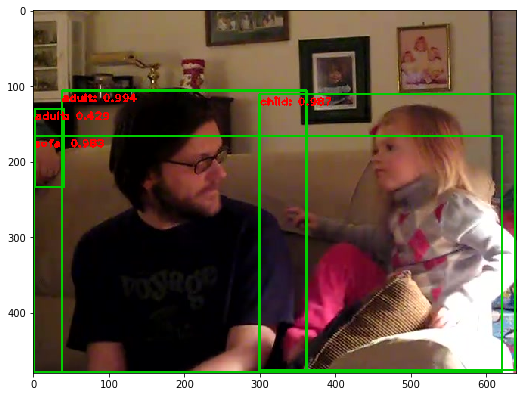

In [23]:
# from utils.vis import vis_detections, vis_detections_allclss
import cv2
import matplotlib

# img_vis = vis_detections(cv2.imread(img_path), vidor_classes[-1], bboxes['4219909195_000002.jpg'], 0.05)
img = cv2.imread(img_path)
img_vis = vis_detections_allclss(img, bboxes['4219909195_000600.jpg'], vidor_classes, 0.2)
# result_path = os.path.join('data/vis/vidor_val',vid+'-'+str(j)+'-'+fid)
# cv2.imwrite(result_path, im2show)
# plt.figure(figsize=(img.shape[0],img.shape[1]))
# plt.figure(figsize=(640, 480))

height, width, depth = img_vis.shape
dpi = matplotlib.rcParams['figure.dpi']

figsize = width / float(dpi), height / float(dpi)
plt.figure(figsize=figsize)

plt.imshow(cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB))
plt.show()